In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import matplotlib.pyplot as plt
from collections import defaultdict
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-ana/train.csv
/kaggle/input/hr-ana/test.csv


# Experiment with the promotion data. Code from ECE 143 project team

Task 1:import and cleaning 

In [3]:
# Import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the CSV file into Python
A_data = pd.read_csv("../input/hr-ana/train.csv")
A_data = A_data.dropna()

# Directly assigning individual field columns different integer value #

# gender
A_data.gender[A_data.gender == 'm'] = 1 #male -> 1
A_data.gender[A_data.gender == 'f'] = 2 #femal -> 2
A_data["gender"] = A_data["gender"].astype('int64')

# department
A_data.department[A_data.department == 'Analytics'] = 1         #Analytics -> 1
A_data.department[A_data.department == 'Finance'] = 2           #Finance -> 2
A_data.department[A_data.department == 'HR'] = 3                #HR -> 3
A_data.department[A_data.department == 'Legal'] = 4             #Legal -> 4
A_data.department[A_data.department == 'Operations'] = 5        #Operations -> 5
A_data.department[A_data.department == 'Procurement'] = 6       #Procurement -> 6
A_data.department[A_data.department == 'R&D'] = 7               #R&D -> 7
A_data.department[A_data.department == 'Sales & Marketing'] = 8 #Sales & Marketing -> 8
A_data.department[A_data.department == 'Technology'] = 9        #Technology -> 9
A_data["department"] = A_data["department"].astype('int64')

# region
A_data.region[A_data.region == 'region_1'] = 1   #region_1 -> 1
A_data.region[A_data.region == 'region_2'] = 2   #region_2 -> 2
A_data.region[A_data.region == 'region_3'] = 3   #region_3 -> 3
A_data.region[A_data.region == 'region_4'] = 4   #region_4 -> 4
A_data.region[A_data.region == 'region_5'] = 5   #region_5 -> 5
A_data.region[A_data.region == 'region_6'] = 6   #region_6 -> 6
A_data.region[A_data.region == 'region_7'] = 7   #region_7 -> 7
A_data.region[A_data.region == 'region_8'] = 8   #region_8 -> 8
A_data.region[A_data.region == 'region_9'] = 9   #region_9 -> 9
A_data.region[A_data.region == 'region_10'] = 10 #region_10 -> 10
A_data.region[A_data.region == 'region_11'] = 11 #region_11 -> 11
A_data.region[A_data.region == 'region_12'] = 12 #region_12 -> 12
A_data.region[A_data.region == 'region_13'] = 13 #region_13 -> 13
A_data.region[A_data.region == 'region_14'] = 14 #region_14 -> 14
A_data.region[A_data.region == 'region_15'] = 15 #region_15 -> 15
A_data.region[A_data.region == 'region_16'] = 16 #region_16 -> 16
A_data.region[A_data.region == 'region_17'] = 17 #region_17 -> 17
A_data.region[A_data.region == 'region_18'] = 18 #region_18 -> 18
A_data.region[A_data.region == 'region_19'] = 19 #region_19 -> 19
A_data.region[A_data.region == 'region_20'] = 20 #region_20 -> 20
A_data.region[A_data.region == 'region_21'] = 21 #region_21 -> 21
A_data.region[A_data.region == 'region_22'] = 22 #region_22 -> 22
A_data.region[A_data.region == 'region_23'] = 23 #region_23 -> 23
A_data.region[A_data.region == 'region_24'] = 24 #region_24 -> 24
A_data.region[A_data.region == 'region_25'] = 25 #region_25 -> 25
A_data.region[A_data.region == 'region_26'] = 26 #region_26 -> 26
A_data.region[A_data.region == 'region_27'] = 27 #region_27 -> 27
A_data.region[A_data.region == 'region_28'] = 28 #region_28 -> 28
A_data.region[A_data.region == 'region_29'] = 29 #region_29 -> 29
A_data.region[A_data.region == 'region_30'] = 30 #region_30 -> 30
A_data.region[A_data.region == 'region_31'] = 31 #region_31 -> 31
A_data.region[A_data.region == 'region_32'] = 32 #region_32 -> 32
A_data.region[A_data.region == 'region_33'] = 33 #region_33 -> 33
A_data.region[A_data.region == 'region_34'] = 34 #region_34 -> 34
A_data["region"] = A_data["region"].astype('int64')

# education
A_data.education[A_data.education == "Bachelor's"] = 1       #Bachelor's -> 1
A_data.education[A_data.education == "Below Secondary"] = 2  #Below Secondary -> 2
A_data.education[A_data.education == "Master's & above"] = 3 #Master's & above -> 3
A_data["education"] = A_data["education"].astype('int64')

# recruitment_channel
A_data.recruitment_channel[A_data.recruitment_channel == 'other'] = 1    #other -> 1
A_data.recruitment_channel[A_data.recruitment_channel == 'sourcing'] = 2 #sourcing -> 2
A_data.recruitment_channel[A_data.recruitment_channel == 'referred'] = 3 #referred -> 3
A_data["recruitment_channel"] = A_data["recruitment_channel"].astype('int64')

# drop unecessary employee ID for analysis
A_data.drop(['employee_id'], axis = 1, inplace = True)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying t

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to b

Summary: 
1. the data is load with variable name 'A_data'
2. all the variable are converted to numeric values
3. column 'employee_id' is droped
Comment: 
1.Hardwork for changing all values  to numbers. 
Maybe we could think what is the benifit of doing that towards the next step'visualization' and others 
2. the missing value seemes not checked and cleaned

# Checking the resulting data

1. Checking the current data format

In [4]:
A_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,8,7,3,2,2,1,35,5.0,8,0,49,0
1,5,22,1,1,1,1,30,5.0,4,0,60,0
2,8,19,1,1,2,1,34,3.0,7,0,50,0
3,8,23,1,1,1,2,39,1.0,10,0,50,0
4,9,26,1,1,1,1,45,3.0,2,0,73,0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'department'}>,
        <AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'education'}>],
       [<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'recruitment_channel'}>,
        <AxesSubplot:title={'center':'no_of_trainings'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'previous_year_rating'}>,
        <AxesSubplot:title={'center':'length_of_service'}>],
       [<AxesSubplot:title={'center':'awards_won?'}>,
        <AxesSubplot:title={'center':'avg_training_score'}>,
        <AxesSubplot:title={'center':'is_promoted'}>]], dtype=object)

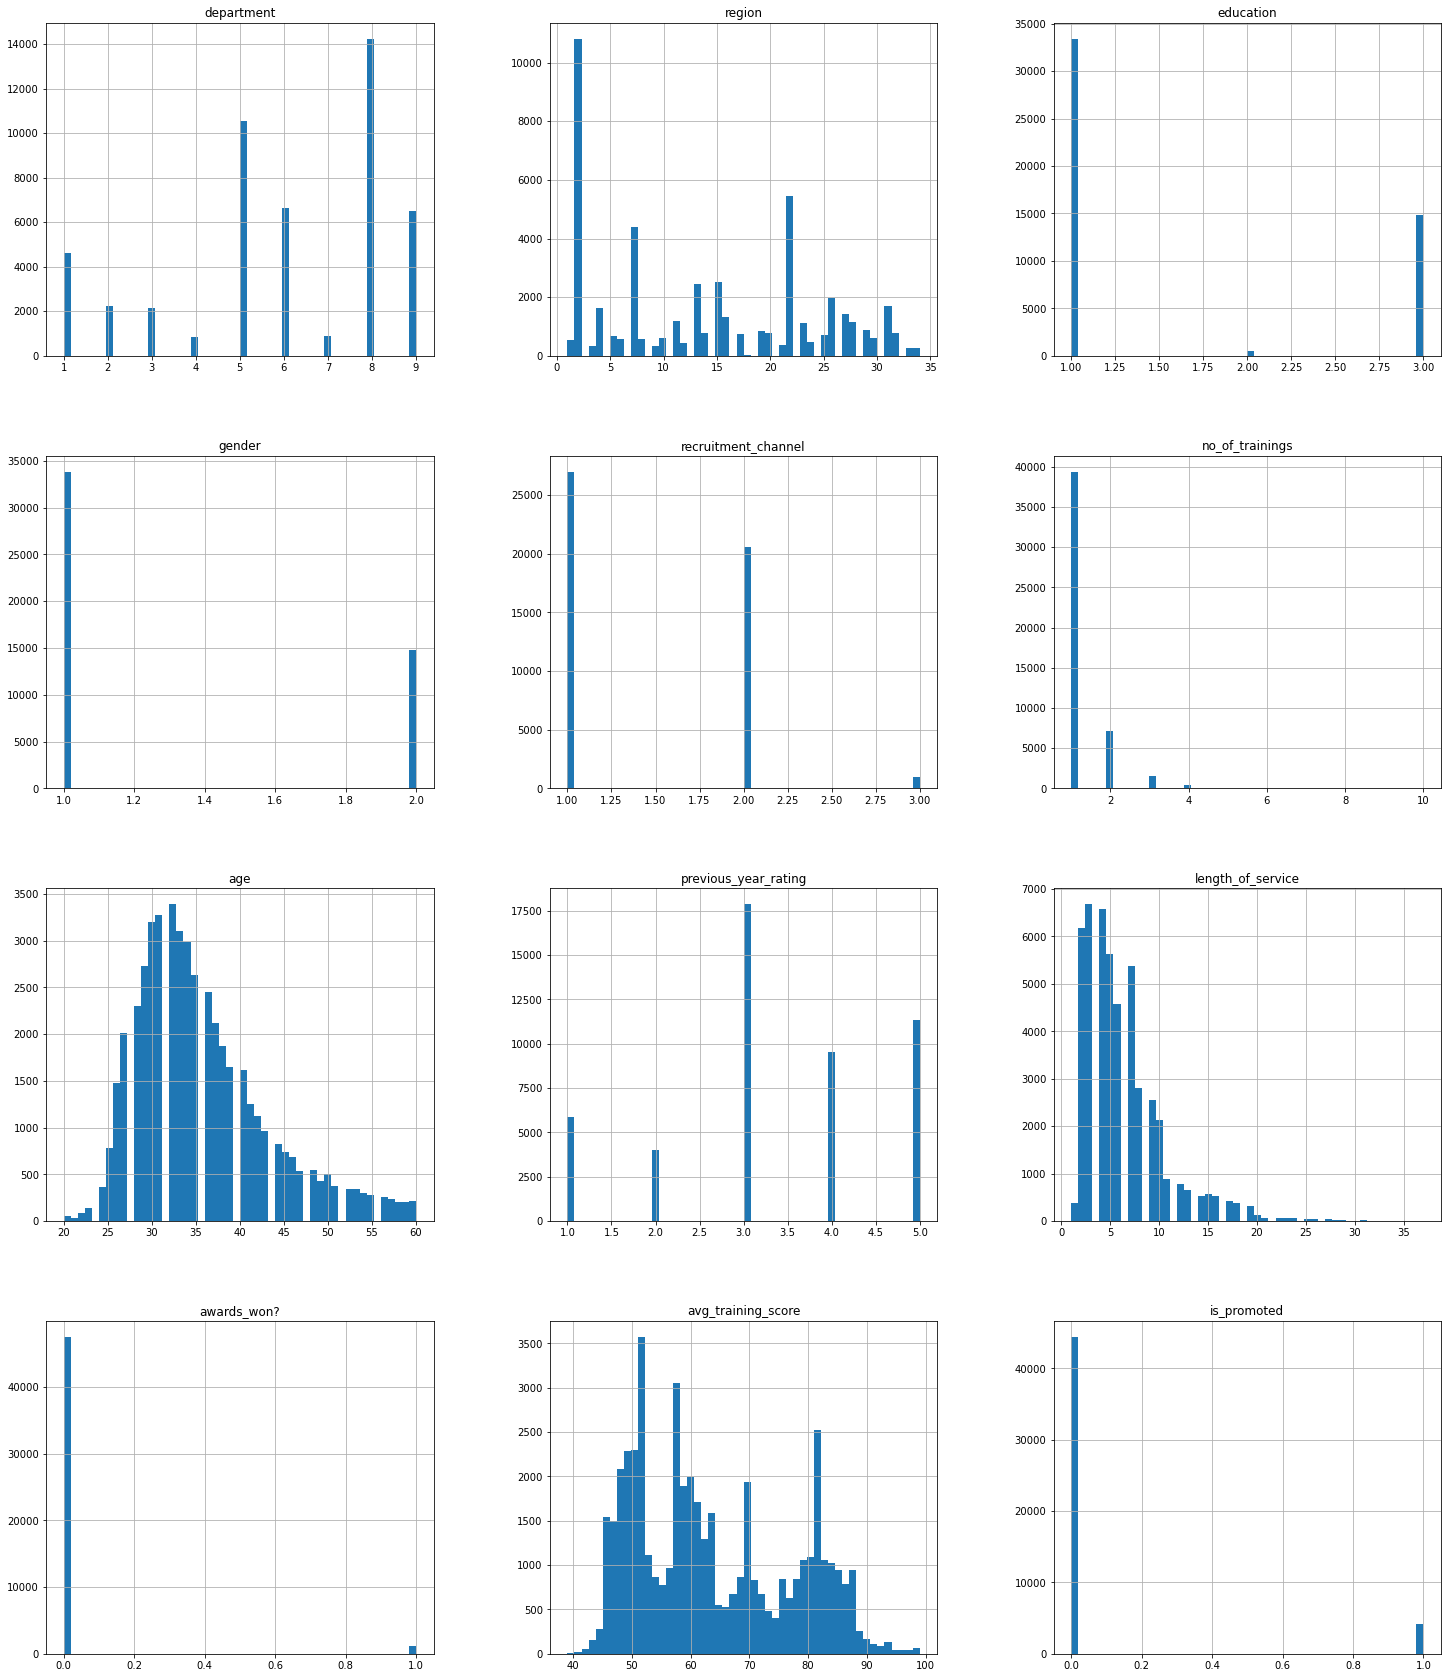

In [5]:
fig = plt.figure(figsize = (25,30))
ax = fig.gca()
A_data.hist(ax  =ax,bins = 50)

In [6]:
for x in A_data:
    print(len(A_data[x].unique()),x)

9 department
34 region
3 education
2 gender
3 recruitment_channel
10 no_of_trainings
41 age
5 previous_year_rating
35 length_of_service
2 awards_won?
61 avg_training_score
2 is_promoted


The number of non-NA count

In [7]:
A_data.count()

department              48660
region                  48660
education               48660
gender                  48660
recruitment_channel     48660
no_of_trainings         48660
age                     48660
previous_year_rating    48660
length_of_service       48660
awards_won?             48660
avg_training_score      48660
is_promoted             48660
dtype: int64

The number of N/A

In [8]:
A_data.isna().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

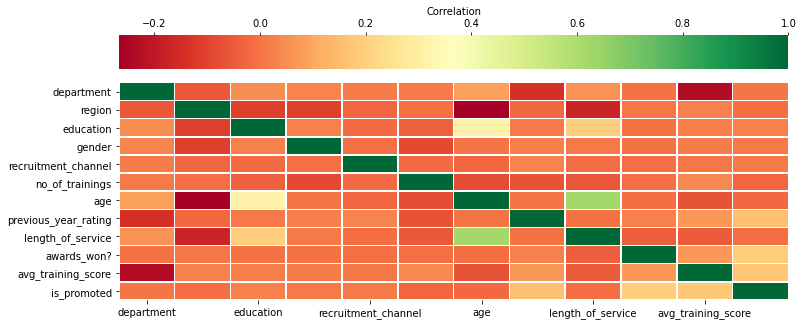

In [9]:
plt.figure(figsize=(12,5))
heatmap = sns.heatmap(A_data.corr(), cmap="RdYlGn", cbar_kws = dict(use_gridspec=False, location="top", label='Correlation'), yticklabels=True, xticklabels=2, annot=False, linewidths=.5)
plt.xticks(rotation=0) 
plt.show()

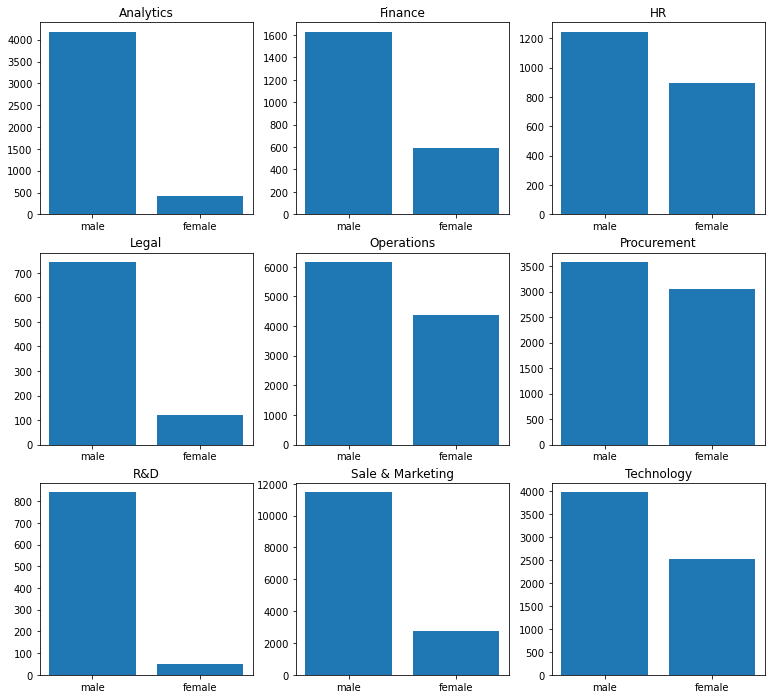

In [10]:
# Compare the amount of male and female employees in different department
dep_gen = defaultdict(list)
for k ,v in zip(list(A_data.department), list(A_data.gender)):
    dep_gen[k].append(v)
x = ['male','female']
an = [dep_gen[1].count(1), dep_gen[1].count(2)]
fi = [dep_gen[2].count(1), dep_gen[2].count(2)]
hr = [dep_gen[3].count(1), dep_gen[3].count(2)]
le = [dep_gen[4].count(1), dep_gen[4].count(2)]
op = [dep_gen[5].count(1), dep_gen[5].count(2)]
pr = [dep_gen[6].count(1), dep_gen[6].count(2)]
rd = [dep_gen[7].count(1), dep_gen[7].count(2)]
sa = [dep_gen[8].count(1), dep_gen[8].count(2)]
te = [dep_gen[9].count(1), dep_gen[9].count(2)]
plt.figure(num=None, figsize=(13, 12))
plt.subplot(3,3,1)
plt.bar(x, an)
plt.title('Analytics')
plt.subplot(3,3,2)
plt.bar(x, fi)
plt.title('Finance')
plt.subplot(3,3,3)
plt.bar(x, hr)
plt.title('HR')
plt.subplot(3,3,4)
plt.bar(x, le)
plt.title('Legal')
plt.subplot(3,3,5)
plt.bar(x, op)
plt.title('Operations')
plt.subplot(3,3,6)
plt.bar(x, pr)
plt.title('Procurement')
plt.subplot(3,3,7)
plt.bar(x, rd)
plt.title('R&D')
plt.subplot(3,3,8)
plt.bar(x, sa)
plt.title('Sale & Marketing')
plt.subplot(3,3,9)
plt.bar(x, te)
plt.title('Technology');

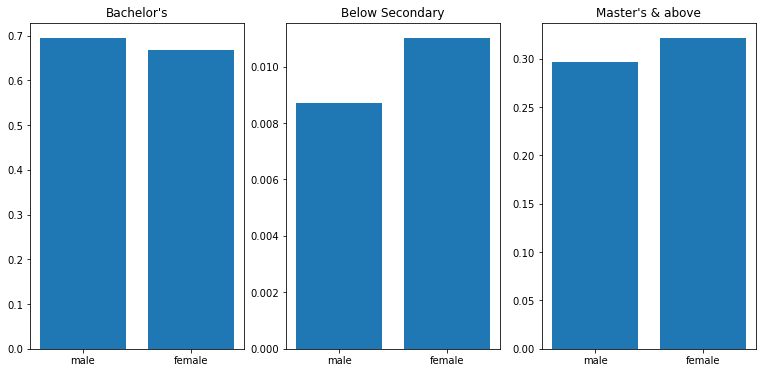

In [11]:
# Compare the ratio of male and female's education degree
edu_gen = defaultdict(list)
for k ,v in zip(list(A_data.education), list(A_data.gender)):
    edu_gen[k].append(v)
mtotal = edu_gen[1].count(1) + edu_gen[2].count(1) + edu_gen[3].count(1)
ftotal = edu_gen[1].count(2) + edu_gen[2].count(2) + edu_gen[3].count(2)
x = ['male','female']
bs = [edu_gen[1].count(1)/mtotal, edu_gen[1].count(2)/ftotal]
be = [edu_gen[2].count(1)/mtotal, edu_gen[2].count(2)/ftotal]
ms = [edu_gen[3].count(1)/mtotal, edu_gen[3].count(2)/ftotal]
plt.figure(num=None, figsize=(13, 6))
plt.subplot(1,3,1)
plt.bar(x, bs)
plt.title('Bachelor\'s')
plt.subplot(1,3,2)
plt.bar(x, be)
plt.title('Below Secondary')
plt.subplot(1,3,3)
plt.bar(x, ms)
plt.title('Master\'s & above');

Feature selections
use mutual information and chi2 from sklearn

In [12]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif as ms
from sklearn.feature_selection import chi2
import plotly.graph_objects as go

In [13]:
y = A_data['is_promoted']
x = A_data.drop(['is_promoted'],axis =1)
#examine the mutal information 
mutual_info = ms(x, y)
chi2_stat,pval = chi2(x,y)

For mutual information, higher value indicate positive correlation

In [14]:

fig = go.Figure(data=[go.Table(header=dict(values=['Features','Mutual Information'],fill_color='paleturquoise',align='left'),
                 cells=dict(values=[x.columns,mutual_info],align='left'))
                     ])
fig.show()

For chi-square test, 
p value > 0.05 means likely independent
higher chi-square statistics means likely dependent

In [15]:
fig = go.Figure(data=[go.Table(header=dict(values=['Features','chi-squared statistics','p value'],fill_color='paleturquoise',align='left'),
                 cells=dict(values=[x.columns,chi2_stat,pval],align='left'))
                     ])
fig.show()

Using Naive Bayes model. 
In this context, conditional independence is assumed between features.

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot  as plt
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SVMSMOTE 
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter
from numpy import where
from sklearn.metrics import classification_report


Prepare dataset

1. Remove features that are independent for promotion
2. Select categorical data for SMOTE-NC(Avoid producing meaningless sythnetic data points)

In [17]:
# filter out independent feature to output
dependentIndex = x.columns[pval<0.5]
X = x.loc[:,dependentIndex]
# split dataset whille maintaining the class distrubution by strtify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify =y,random_state=42)

Fixing imbalanced dataset

1. smote-nc(add miniority samples using knn)

In [18]:
Potential_categorical = []
for i,col in enumerate(x):
    if len(x[col].unique()) <35:
        Potential_categorical.append(i)
smotenc = SMOTENC(Potential_categorical,random_state = 101)
X_oversample, y_oversample = smotenc.fit_resample(X_train, y_train)

Add smote using svm algorithm

In [19]:
sm = SVMSMOTE(random_state=42)
X_oversample, y_oversample = sm.fit_resample(X_train, y_train)

The SVM (called SVC here) are commented as the runtime is toolong 

Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=3))])
Train report*****************
               precision    recall  f1-score   support

Not Promoted       0.94      0.99      0.96     35542
    Promoted       0.78      0.28      0.42      3386

    accuracy                           0.93     38928
   macro avg       0.86      0.64      0.69     38928
weighted avg       0.92      0.93      0.92     38928

Test report*****************
               precision    recall  f1-score   support

Not Promoted       0.92      0.98      0.95      8886
    Promoted       0.42      0.14      0.22       846

    accuracy                           0.91      9732
   macro avg       0.67      0.56      0.58      9732
weighted avg       0.88      0.91      0.89      9732



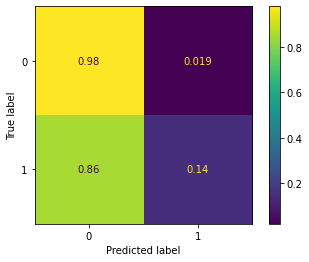

Pipeline(steps=[('classifier', DecisionTreeClassifier())])
Train report*****************
               precision    recall  f1-score   support

Not Promoted       1.00      1.00      1.00     35542
    Promoted       1.00      0.99      1.00      3386

    accuracy                           1.00     38928
   macro avg       1.00      1.00      1.00     38928
weighted avg       1.00      1.00      1.00     38928

Test report*****************
               precision    recall  f1-score   support

Not Promoted       0.93      0.91      0.92      8886
    Promoted       0.23      0.28      0.25       846

    accuracy                           0.85      9732
   macro avg       0.58      0.59      0.58      9732
weighted avg       0.87      0.85      0.86      9732



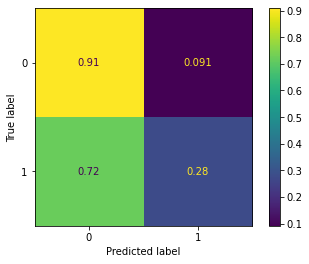

Pipeline(steps=[('classifier', RandomForestClassifier())])
Train report*****************
               precision    recall  f1-score   support

Not Promoted       1.00      1.00      1.00     35542
    Promoted       1.00      1.00      1.00      3386

    accuracy                           1.00     38928
   macro avg       1.00      1.00      1.00     38928
weighted avg       1.00      1.00      1.00     38928

Test report*****************
               precision    recall  f1-score   support

Not Promoted       0.93      0.99      0.96      8886
    Promoted       0.66      0.17      0.27       846

    accuracy                           0.92      9732
   macro avg       0.79      0.58      0.61      9732
weighted avg       0.90      0.92      0.90      9732



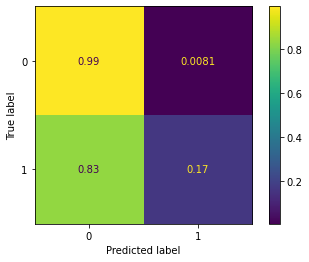

Pipeline(steps=[('classifier', AdaBoostClassifier())])
Train report*****************
               precision    recall  f1-score   support

Not Promoted       0.92      1.00      0.96     35542
    Promoted       0.78      0.15      0.25      3386

    accuracy                           0.92     38928
   macro avg       0.85      0.57      0.60     38928
weighted avg       0.91      0.92      0.90     38928

Test report*****************
               precision    recall  f1-score   support

Not Promoted       0.93      1.00      0.96      8886
    Promoted       0.81      0.16      0.27       846

    accuracy                           0.92      9732
   macro avg       0.87      0.58      0.61      9732
weighted avg       0.92      0.92      0.90      9732



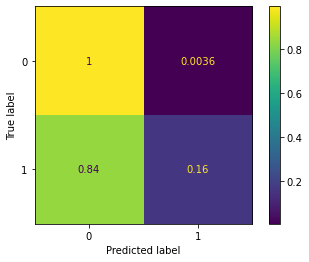

Pipeline(steps=[('classifier', GradientBoostingClassifier())])
Train report*****************
               precision    recall  f1-score   support

Not Promoted       0.93      1.00      0.96     35542
    Promoted       0.85      0.16      0.27      3386

    accuracy                           0.92     38928
   macro avg       0.89      0.58      0.61     38928
weighted avg       0.92      0.92      0.90     38928

Test report*****************
               precision    recall  f1-score   support

Not Promoted       0.93      1.00      0.96      8886
    Promoted       0.84      0.16      0.27       846

    accuracy                           0.92      9732
   macro avg       0.88      0.58      0.62      9732
weighted avg       0.92      0.92      0.90      9732



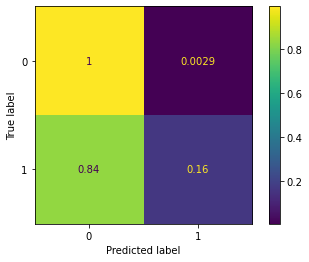

Pipeline(steps=[('classifier', GaussianNB())])
Train report*****************
               precision    recall  f1-score   support

Not Promoted       0.92      0.99      0.95     35542
    Promoted       0.44      0.12      0.19      3386

    accuracy                           0.91     38928
   macro avg       0.68      0.55      0.57     38928
weighted avg       0.88      0.91      0.89     38928

Test report*****************
               precision    recall  f1-score   support

Not Promoted       0.92      0.99      0.95      8886
    Promoted       0.47      0.12      0.19       846

    accuracy                           0.91      9732
   macro avg       0.70      0.55      0.57      9732
weighted avg       0.88      0.91      0.89      9732



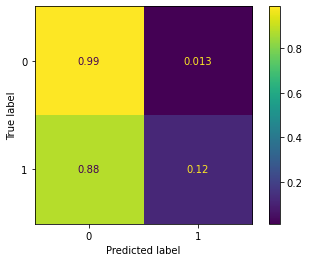

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[00:56:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
          

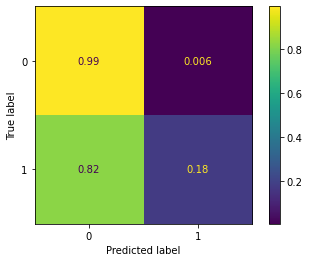

Pipeline(steps=[('classifier', MLPClassifier(max_iter=300, random_state=1))])
Train report*****************
               precision    recall  f1-score   support

Not Promoted       0.92      1.00      0.96     35542
    Promoted       0.70      0.09      0.17      3386

    accuracy                           0.92     38928
   macro avg       0.81      0.54      0.56     38928
weighted avg       0.90      0.92      0.89     38928

Test report*****************
               precision    recall  f1-score   support

Not Promoted       0.92      1.00      0.96      8886
    Promoted       0.71      0.09      0.15       846

    accuracy                           0.92      9732
   macro avg       0.81      0.54      0.56      9732
weighted avg       0.90      0.92      0.89      9732



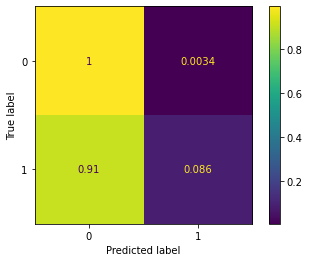

In [20]:

classifiers = [
    KNeighborsClassifier(3),
#     SVC(kernel="rbf", C=0.025),
#     NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    XGBClassifier(),
    MLPClassifier(random_state=1, max_iter=300)
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_oversample, y_oversample)
    train_pred = pipe.predict(X_oversample)
    print(pipe)
    target_names = ['Not Promoted', 'Promoted']
    print('Train report*****************\n',classification_report(y_oversample, train_pred, target_names=target_names))
    plot_confusion_matrix(pipe, X_test, y_test,normalize='true') #{'true', 'pred', 'all'}
    y_pred=pipe.predict(X_test)
    print('Test report*****************\n',classification_report(y_test, y_pred, target_names=target_names))
    plt.show()